In [35]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [37]:
train = pd.read_csv('data/sign_mnist_train.csv', sep=',')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [29]:
class_names = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
    25: 'Z'
}

In [38]:
test = pd.read_csv('data/sign_mnist_test.csv', sep=',')
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [39]:
x_train = train.drop("label", axis=1)
y_train = train["label"]

x_test = test.drop("label", axis=1)
y_test = test["label"]

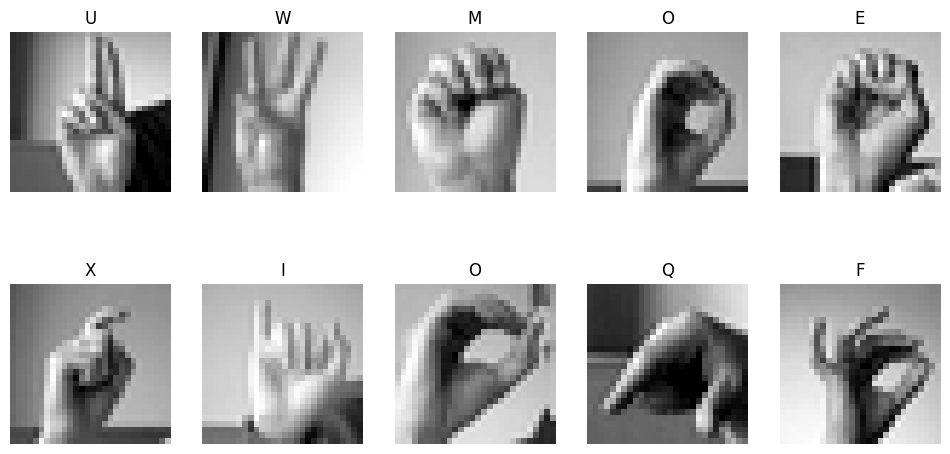

In [40]:
random_sample = np.random.randint(0, len(data) + 1, size=10)

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train.iloc[random_sample[i]].values.reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[random_sample[i]]])
    plt.axis('off')
plt.show()

In [41]:
standard_scaler = StandardScaler()
scaled_x_train = standard_scaler.fit_transform(x_train)
x_train = pd.DataFrame(scaled_x_train, columns=x_train.columns)
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,-0.928951,-0.763625,-0.620852,-0.506458,-0.463774,-0.426610,-0.413304,-0.366583,-0.335512,-0.304798,...,1.033649,0.908302,0.833111,0.751478,0.690817,0.681926,0.678557,0.664063,0.658113,0.654939
1,0.231652,0.212805,0.121680,0.063570,-0.005683,-0.039066,-0.127718,-0.128922,-0.182377,-0.272827,...,-1.131056,0.022964,-0.393098,-1.132135,-1.066399,0.004150,0.190430,-0.931575,-0.410913,-0.168097
2,1.005388,0.988941,0.941025,0.866793,0.829661,0.763704,0.757597,0.762307,0.705804,0.654322,...,0.955217,0.816715,0.724459,0.625904,0.565302,0.571590,0.552589,0.521877,0.516625,0.546237
3,1.585689,1.564785,1.555534,1.514553,1.476378,1.428065,1.443003,1.415875,1.410223,1.453589,...,1.472864,1.320442,1.236673,1.128201,1.067364,0.997170,0.977732,0.948434,1.066859,0.049309
4,0.449265,0.463171,0.480144,0.478137,0.533248,0.569932,0.557687,0.643477,0.644550,0.654322,...,-0.770272,-0.648672,-0.750095,-0.802503,-0.454511,0.004150,-0.092998,0.016328,0.044995,0.297773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,1.053746,1.013978,0.992234,0.944524,0.964393,0.957476,0.928949,0.910845,0.889565,0.910087,...,-0.142821,0.267195,-0.843225,-1.289103,-1.725356,0.587352,1.119446,0.600869,0.956812,1.012106
27451,0.134935,0.137695,0.147285,0.115391,0.102103,0.071661,0.072192,0.049324,0.062638,0.046879,...,0.892472,0.770922,0.693416,0.610207,0.565302,0.524303,0.505351,0.521877,0.532346,0.530708
27452,0.691058,0.638428,0.582562,0.529958,0.479355,0.459205,0.414895,0.346400,0.277027,0.238703,...,-0.315370,0.740393,0.864154,0.767175,0.690817,0.650401,0.631319,0.632466,0.610950,0.623881
27453,0.763595,0.813685,0.838607,0.814972,0.829661,0.846749,0.843273,0.851430,0.828311,0.782205,...,-0.346743,-1.396630,-1.960782,-1.587342,-0.940884,-1.319876,-1.825062,-1.547713,-1.165521,-1.037721


In [42]:
scaled_x_test = standard_scaler.transform(x_test)
x_test = pd.DataFrame(scaled_x_test, columns=x_test.columns)
x_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.086577,0.012511,-0.031947,-0.091892,-0.167362,-0.205156,-0.270511,-0.366583,-0.396766,-0.432681,...,-0.048704,0.007699,-0.408619,-1.100742,-1.254673,-1.051918,-0.896046,-0.789390,-0.646728,-0.820315
1,-0.469546,-0.513258,-0.518433,-0.558279,-0.625454,-0.675746,-0.727448,-0.812197,-0.856169,-0.880270,...,-1.476154,-0.663937,0.631330,0.374755,0.377029,0.335157,0.332145,0.348095,0.327973,0.313302
2,-1.460894,-1.514725,-1.517010,-1.491054,-1.379957,-0.980244,-0.727448,-0.574536,-0.519273,-0.432681,...,-1.146742,0.282459,1.376368,1.065414,1.067364,1.012932,0.993478,0.995829,0.988254,0.965519
3,1.392255,1.414565,1.427512,1.359090,1.368592,1.400384,1.414445,1.386167,1.410223,1.389647,...,0.202277,1.534144,1.453976,1.395046,1.428221,1.154792,1.056462,1.232805,1.444162,1.477976
4,1.029567,1.064051,1.069048,1.074076,1.153019,1.178930,1.185976,1.207922,1.195834,1.197823,...,-1.805566,-1.640861,-1.386482,-1.744310,-2.086213,-1.840029,-1.793570,-1.832084,-1.810081,-1.658881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,-0.251933,-0.738588,-1.107338,-1.335591,-1.379957,-1.644606,-2.840783,-1.762841,-1.315573,-1.040123,...,-0.519292,-0.541821,-0.579357,-0.708322,-0.689853,0.272108,0.332145,0.221708,0.092158,0.049309
7168,0.280011,0.262878,0.249703,0.270854,0.263783,0.210070,0.300660,0.346400,0.338281,0.334615,...,1.127766,0.999888,0.926241,0.861355,0.800644,0.760737,0.741542,0.758853,0.752439,0.748113
7169,1.077925,1.064051,0.992234,0.970434,0.910500,0.874431,0.900390,0.881138,0.828311,0.846146,...,1.174825,1.030417,0.926241,0.861355,0.816333,0.792261,0.741542,0.774651,0.752439,0.748113
7170,1.343897,1.414565,1.453116,1.436821,1.557218,1.594156,1.642913,1.802074,1.900254,2.029061,...,-0.456547,0.328253,1.578149,1.504923,1.177190,-0.783961,-1.132237,-1.500318,-1.432777,-1.503591


In [43]:
pca = PCA(n_components=30)
x_train_reduced = pca.fit_transform(x_train)
x_train_recovered = pca.inverse_transform(x_train_reduced)

x_test_reduced = pca.transform(x_test)
x_test_recovered = pca.inverse_transform(x_test_reduced)

In [7]:
tsne = TSNE(random_state=0, verbose=1)
x_tsne = pd.DataFrame(tsne.fit_transform(x_reduced))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 27455 samples in 0.002s...
[t-SNE] Computed neighbors for 27455 samples in 0.890s...
[t-SNE] Computed conditional probabilities for sample 1000 / 27455
[t-SNE] Computed conditional probabilities for sample 2000 / 27455
[t-SNE] Computed conditional probabilities for sample 3000 / 27455
[t-SNE] Computed conditional probabilities for sample 4000 / 27455
[t-SNE] Computed conditional probabilities for sample 5000 / 27455
[t-SNE] Computed conditional probabilities for sample 6000 / 27455
[t-SNE] Computed conditional probabilities for sample 7000 / 27455
[t-SNE] Computed conditional probabilities for sample 8000 / 27455
[t-SNE] Computed conditional probabilities for sample 9000 / 27455
[t-SNE] Computed conditional probabilities for sample 10000 / 27455
[t-SNE] Computed conditional probabilities for sample 11000 / 27455
[t-SNE] Computed conditional probabilities for sample 12000 / 27455
[t-SNE] Computed conditional probabilities for sam

posx and posy should be finite values
posx and posy should be finite values


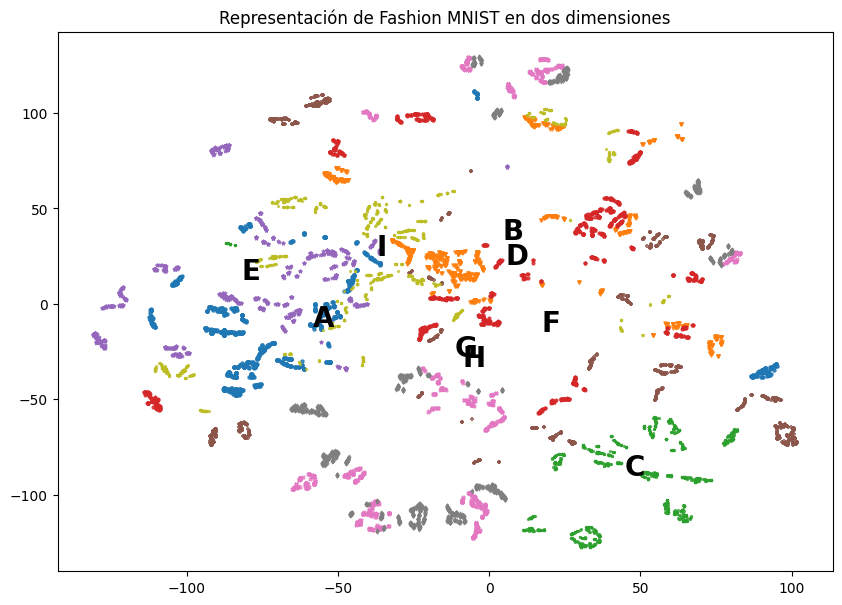

In [43]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
plt.figure(figsize=(10, 7))
plt.title('Representación de Fashion MNIST en dos dimensiones');
for i in range(10):
    selections = x_tsne.iloc[y_train[y_train==i].index]
    plt.scatter(selections[0], selections[1], alpha=0.8, marker=MARKER[i], s=5)
    x, y = selections.mean(axis=0)
    plt.text(x, y, str(class_names[i]), fontdict={'weight': 'bold', 'size': 20})
plt.show()

In [26]:
class Context:
    '''
    Clase que permite almacenar el contexto de ejecución de los pasos 
    del pipeline. Esta clase será particularmente útil en el último 
    paso del pipeline donde necesitaremoslos datos generados por todos 
    los pasos del pipeline para imprimir el detalle de los resultados.
    '''
    def __init__(self) -> None :
        self.centroids = None
        self.labels = None

    def transform(self, X, y=None):
        return self

In [27]:
class ImageLoader(BaseEstimator, TransformerMixin) :
    '''
    Este paso del pipeline se encarga de cargar la imagen a partir de un 
    archivo. En este paso se recibe un archivo y se retorna una matriz 
    de pixeles en formato RGB. 
    '''
    def __init__(self, context) -> None:
        self.context = context

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        '''
        Recibe un archivo en el parámetro X y retorna una matriz de 
        pixeles en formato RGB como resultado de la transformación. 
        '''
        img = cv2.imread(X)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        self.context.original_img = img

        return img

In [ ]:
class ImageProcessor(BaseEstimator, TransformerMixin) :
    '''
    Este paso del pipeline se encarga de hacer el pre-procesamiento 
    necesario para el entrenamiento del modelo. Concretamente, 
    en este paso se recibe una imagen como una matriz de pixeles 
    en RGB se retorna un arreglo de números. El arreglo esta normalizado. 
    '''
    def __init__(self, context, num_components=10) -> None:
        self.context = context
        self.num_components = num_components

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        '''
        Recibe una matriz de pixeles RGB en el parámetro X y retorna un 
        arreglo de tres dimensiones normalizado al rango [0, 1]. 
        '''
        img = X

        # Applicando reducción de la dimensionalidad.
        reduced_img = self.reduce(X)

        # Transformando la imagen en un arreglo de N*3 para facilitar el procesamiento.
        img = reduced_img.reshape((-1, 3))        
        img = img / 255.0

        self.context.normalized_img = img
        self.context.reduced_img = reduced_img
        return img
    
    
    def reduce(self, img, method='pca') :
        x = len(img)    
        y = len(img[0])
        z = len(img[0][0])

        reduced_img = img.reshape((x, y*z))
        pca = PCA(n_components = self.num_components)
        reduced_img = pca.fit_transform(reduced_img)
        reduced_img = pca.inverse_transform(reduced_img)
        reduced_img = reduced_img.reshape((x, y, z))
    
        return reduced_img


In [28]:
class PrettyPrinter(BaseEstimator, TransformerMixin) :
    '''
    Finalmente, queremos imprimir las imagenes original y 
    segmentada así como la paleta de colores formada por los 
    centroides encontrados por k-means. 
    '''
    def __init__(self, context) -> None:
        self.context = context

    def fit(self, X, y=None):
        plt.figure()

        plt.subplot(1, 1, 1)
        plt.title('Imagen original')
        plt.imshow(self.context.original_img)
        plt.axis('off')

        plt.tight_layout()
        plt.show()
        
        print('----')
        print('')

        return self

Processing image in: data/amer_sign2.png


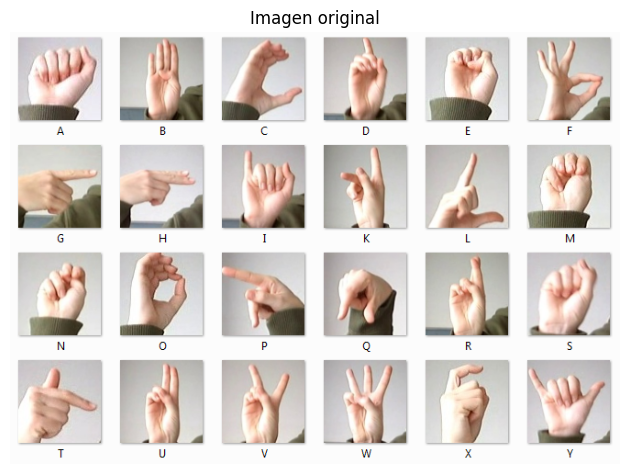

----

Processing image in: data/amer_sign3.png


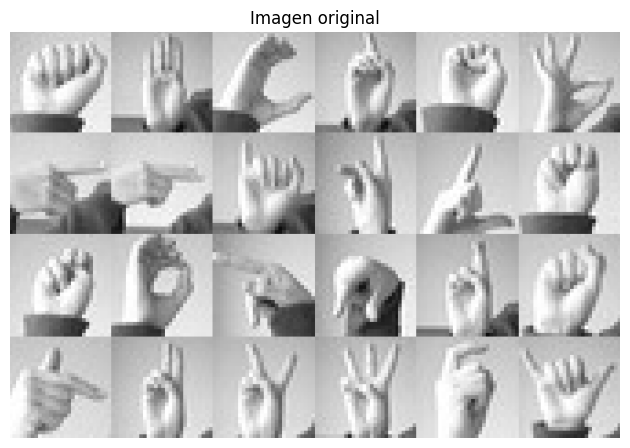

----



In [31]:
images = ['data/amer_sign2.png', 'data/amer_sign3.png']

for i in range(len(images)):
    image = images[i]
    print(f'Processing image in: {image}')
    context = Context()
    steps = [
        ("loader", ImageLoader(context)),
        ("prettyPrinter", PrettyPrinter(context))
    ]
    pipeline = Pipeline(steps)
    pipeline.fit(X=image)